In [1]:
%pip install numpy pandas scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

data = transactions.merge(customers, on="CustomerID", how="left")

clustering_data = data.groupby("CustomerID").agg({
    "TotalValue": "sum",    
    "Quantity": "sum",     
    "TransactionID": "count",  
    "Region": "first"       
}).reset_index()


clustering_data = pd.get_dummies(clustering_data, columns=["Region"], drop_first=True)

scaler = StandardScaler()
numerical_cols = ["TotalValue", "Quantity", "TransactionID"]
clustering_data[numerical_cols] = scaler.fit_transform(clustering_data[numerical_cols])

customer_ids = clustering_data["CustomerID"]
clustering_data = clustering_data.drop("CustomerID", axis=1)

print("Clustering Data (after preprocessing):")
print(clustering_data.head())

Clustering Data (after preprocessing):
   TotalValue  Quantity  TransactionID  Region_Europe  Region_North America  \
0   -0.061701 -0.122033      -0.011458          False                 False   
1   -0.877744 -0.448000      -0.467494          False                 False   
2   -0.405857  0.203934      -0.467494          False                 False   
3    1.032547  1.670787       1.356650          False                 False   
4   -0.783929 -0.936951      -0.923530          False                 False   

   Region_South America  
0                  True  
1                 False  
2                  True  
3                  True  
4                 False  


In [4]:

optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clustering_data["Cluster"] = kmeans.fit_predict(clustering_data)
clustering_data["CustomerID"] = customer_ids

In [5]:

db_index = davies_bouldin_score(clustering_data.drop(["Cluster", "CustomerID"], axis=1), clustering_data["Cluster"])
print(f"Davies-Bouldin Index (DB Index): {db_index}")

inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Davies-Bouldin Index (DB Index): 1.220890947101179
Inertia: 224.31950481525908


C:\Users\Jaggu\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jaggu\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


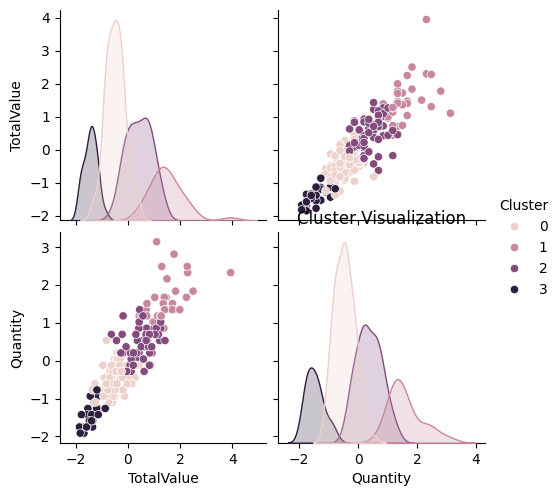

C:\Users\Jaggu\AppData\Local\Temp\ipykernel_17200\510005052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=clustering_data, palette="viridis")
C:\Users\Jaggu\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jaggu\AppData\Roaming\Python\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jaggu\AppData\Ro

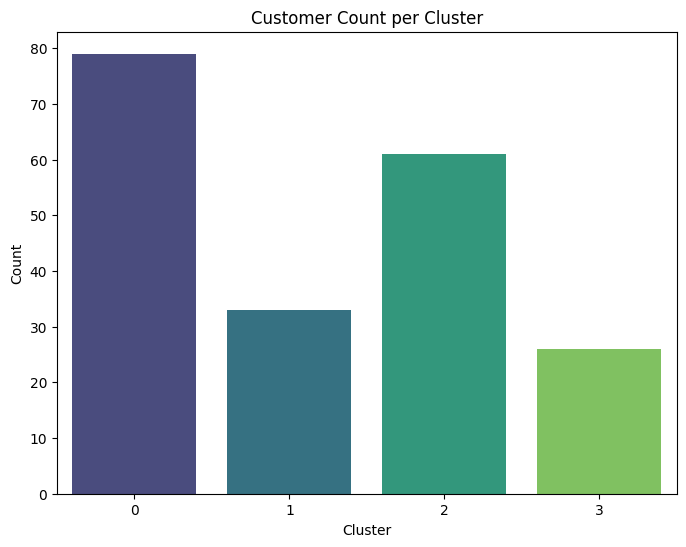

In [6]:

sns.pairplot(clustering_data, hue="Cluster", vars=["TotalValue", "Quantity"])
plt.title("Cluster Visualization")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x="Cluster", data=clustering_data, palette="viridis")
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [7]:

cluster_summary = clustering_data.groupby("Cluster").agg({
    "TotalValue": "mean",
    "Quantity": "mean",
    "TransactionID": "mean"
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

clustering_data[["CustomerID", "Cluster"]].to_csv("CustomerClusters.csv", index=False)

Cluster Summary:
   Cluster  TotalValue  Quantity  TransactionID
0        0   -0.489047 -0.472757      -0.461722
1        1    1.500680  1.596703       1.508662
2        2    0.432296  0.374933       0.414674
3        3   -1.432989 -1.469782      -1.484805
